## Tasca S6 T01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

**Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.**

#### Import dataset

In [2]:
#nombramos columnas dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#cargamos dataset
df = pd.read_csv("dataset/housing data.csv", index_col = None, header = None, names = column_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Relevant Information:** Concerns housing values in suburbs of Boston.

**Number of Instances:** 506

**Number of Attributes:** 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

**Attribute Information:**

    1. CRIM: per capita crime rate by town
    2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS: proportion of non-retail business acres per town
    4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX: nitric oxides concentration (parts per 10 million)
    6. RM: average number of rooms per dwelling
    7. AGE: proportion of owner-occupied units built prior to 1940
    8. DIS: weighted distances to five Boston employment centres
    9. RAD: index of accessibility to radial highways
    10. TAX: full-value property-tax rate per 10,000 dollars
    11. PTRATIO: pupil-teacher ratio by town
    12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
    13. LSTAT: % lower status of the population
    14. MEDV: Median value of owner-occupied homes in $1000s.
    


#### Primera exploración gráfica y descriptiva de los atributos del dataset

Estudiamos el conjunto a nivel descriptivo y vemos la correlación de las diferentes variables.

In [3]:
data1 = df.describe().transpose()
data1[["mean", "std", "min", "max"]]

,mean,std,min,max
CRIM,3.613524,8.601545,0.00632,88.9762
ZN,11.363636,23.322453,0.00000,100.0000
INDUS,11.136779,6.860353,0.46000,27.7400
CHAS,0.069170,0.253994,0.00000,1.0000
NOX,0.554695,0.115878,0.38500,0.8710
RM,6.284634,0.702617,3.56100,8.7800
AGE,68.574901,28.148861,2.90000,100.0000
DIS,3.795043,2.105710,1.12960,12.1265
RAD,9.549407,8.707259,1.00000,24.0000
TAX,408.237154,168.537116,187.00000,711.0000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


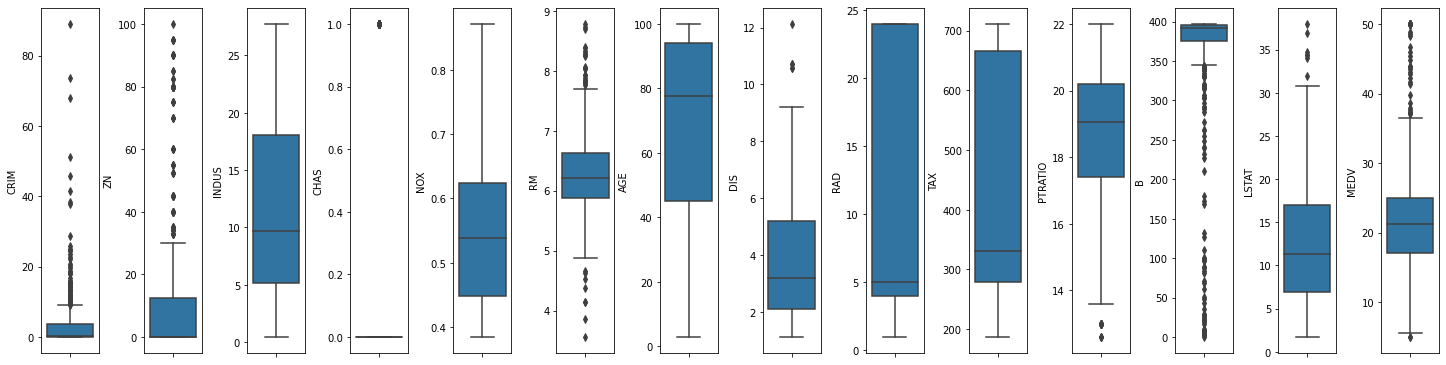

In [5]:
fig, axs = plt.subplots(ncols=14, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Matriz de correlación

<AxesSubplot:>

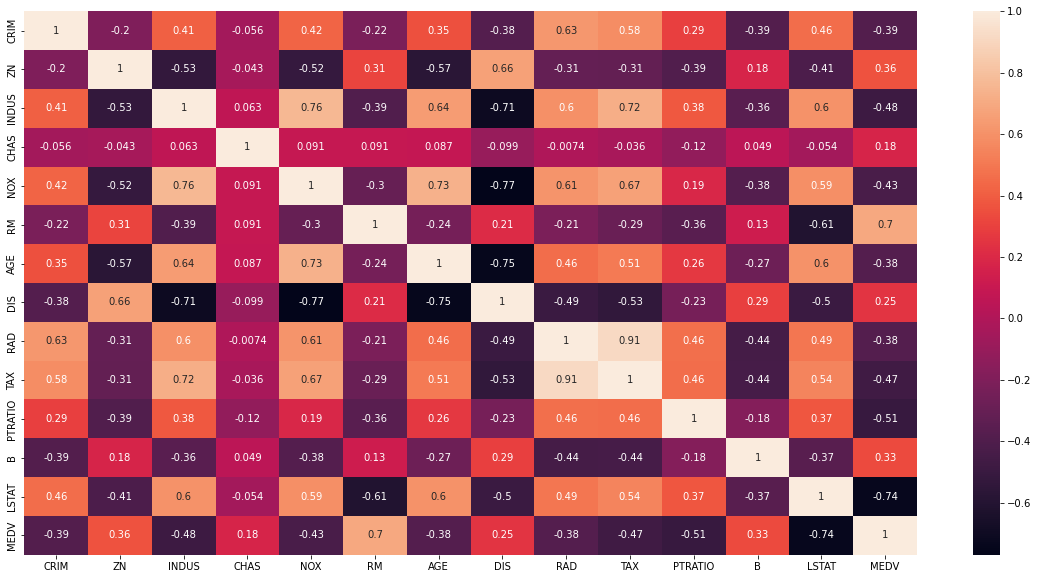

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)

En este primer análisis, nos permitiremos el tiempo de analizar nuestra base datos en relación a la columna objetivo **MEDV**, tal y como veremos más adelante.  

Si prestamos atención podemos ver dos variables que se relacionan directamente con el precio de la vivienda:
* **LSTAT**, con el porcentaje de población con menos ingresos.
* **RM**, promedio de habitaciones por vivienda. Podemos suponer que las casas con más habitaciones, o lo  que es lo mismo, las casas más grandes tienen un valor más alto ya que pueden albergar a más gente.


## Exercici 1

*Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.*

### 1. Preprocesado

El primer paso será realizar una exploración del conjunto de datos. Esta revisión nos servirá para evitar errores en el análisis de los datos y en el proceso de modelado.

In [7]:
df.isnull().values.any()

False

In [8]:
df.isna().values.any()

False

No tenemos valores nulos y consideramos que no existen datos anormales.

In [9]:
print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for c in df:
    stat, p = shapiro(df[c])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print(c + ' Probably Gaussian\n')
    else:
        print(c + ' Probably NOT Gaussian\n')

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


stat=0.450, p=0.000
CRIM Probably NOT Gaussian

stat=0.556, p=0.000
ZN Probably NOT Gaussian

stat=0.900, p=0.000
INDUS Probably NOT Gaussian

stat=0.275, p=0.000
CHAS Probably NOT Gaussian

stat=0.936, p=0.000
NOX Probably NOT Gaussian

stat=0.961, p=0.000
RM Probably NOT Gaussian

stat=0.892, p=0.000
AGE Probably NOT Gaussian

stat=0.903, p=0.000
DIS Probably NOT Gaussian

stat=0.680, p=0.000
RAD Probably NOT Gaussian

stat=0.815, p=0.000
TAX Probably NOT Gaussian

stat=0.904, p=0.000
PTRATIO Probably NOT Gaussian

stat=0.477, p=0.000
B Probably NOT Gaussian

stat=0.937, p=0.000
LSTAT Probably NOT Gaussian

stat=0.917, p=0.000
MEDV Probably NOT Gaussian



Como vemos en los resultados, se descarta la hipótesis nula ya que en el conjunto de datos no se presentant ninguna distribución normal y, por lo tanto, no podemos aplicar la estandarización en los datos.

Procesos de ingenieria a aplicar:

* Las variables **INDUS**, **NOX**, **AGE**, **TAX** *NO* tienen una distribución normal, utilizaremos la ***normalización***. 
* Las variables **CRIM**, **ZN**, **RM**,**DIS**, **PTRATIO**, **B**, **LSTAT** tienen *outliers*, por lo tanto se hará ***RobustScaler***.  
* La variable **RAD** es un array con ordenación numerica ([ 1,  2,  3,  5,  4,  8,  6,  7, 24], se puede plantear crear columnas dummies.
* La variable **CHAS** es categórica "dummie", ya aplicada en el modelo de datos *(= 1 if tract bounds river; 0 otherwise)*. 

In [10]:
#MinMaxScaler para la normalización
normColumns = ['INDUS','NOX','AGE', 'TAX']
scalerNorm = preprocessing.MinMaxScaler().fit(df[normColumns])
df[normColumns] = scalerNorm.transform(df[normColumns])

#RobustScaler para las variables con outliers
robColumns = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
robustScaler = preprocessing.RobustScaler().fit(df[robColumns])
df[robColumns] = robustScaler.transform(df[robColumns])

#Creamos columnas dummies
df = pd.get_dummies(df, columns=["RAD"],drop_first = False)
df = pd.get_dummies(df, columns=["CHAS"],drop_first = False)

In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'MEDV', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6',
       'RAD_7', 'RAD_8', 'RAD_24', 'CHAS_0', 'CHAS_1'],
      dtype='object')

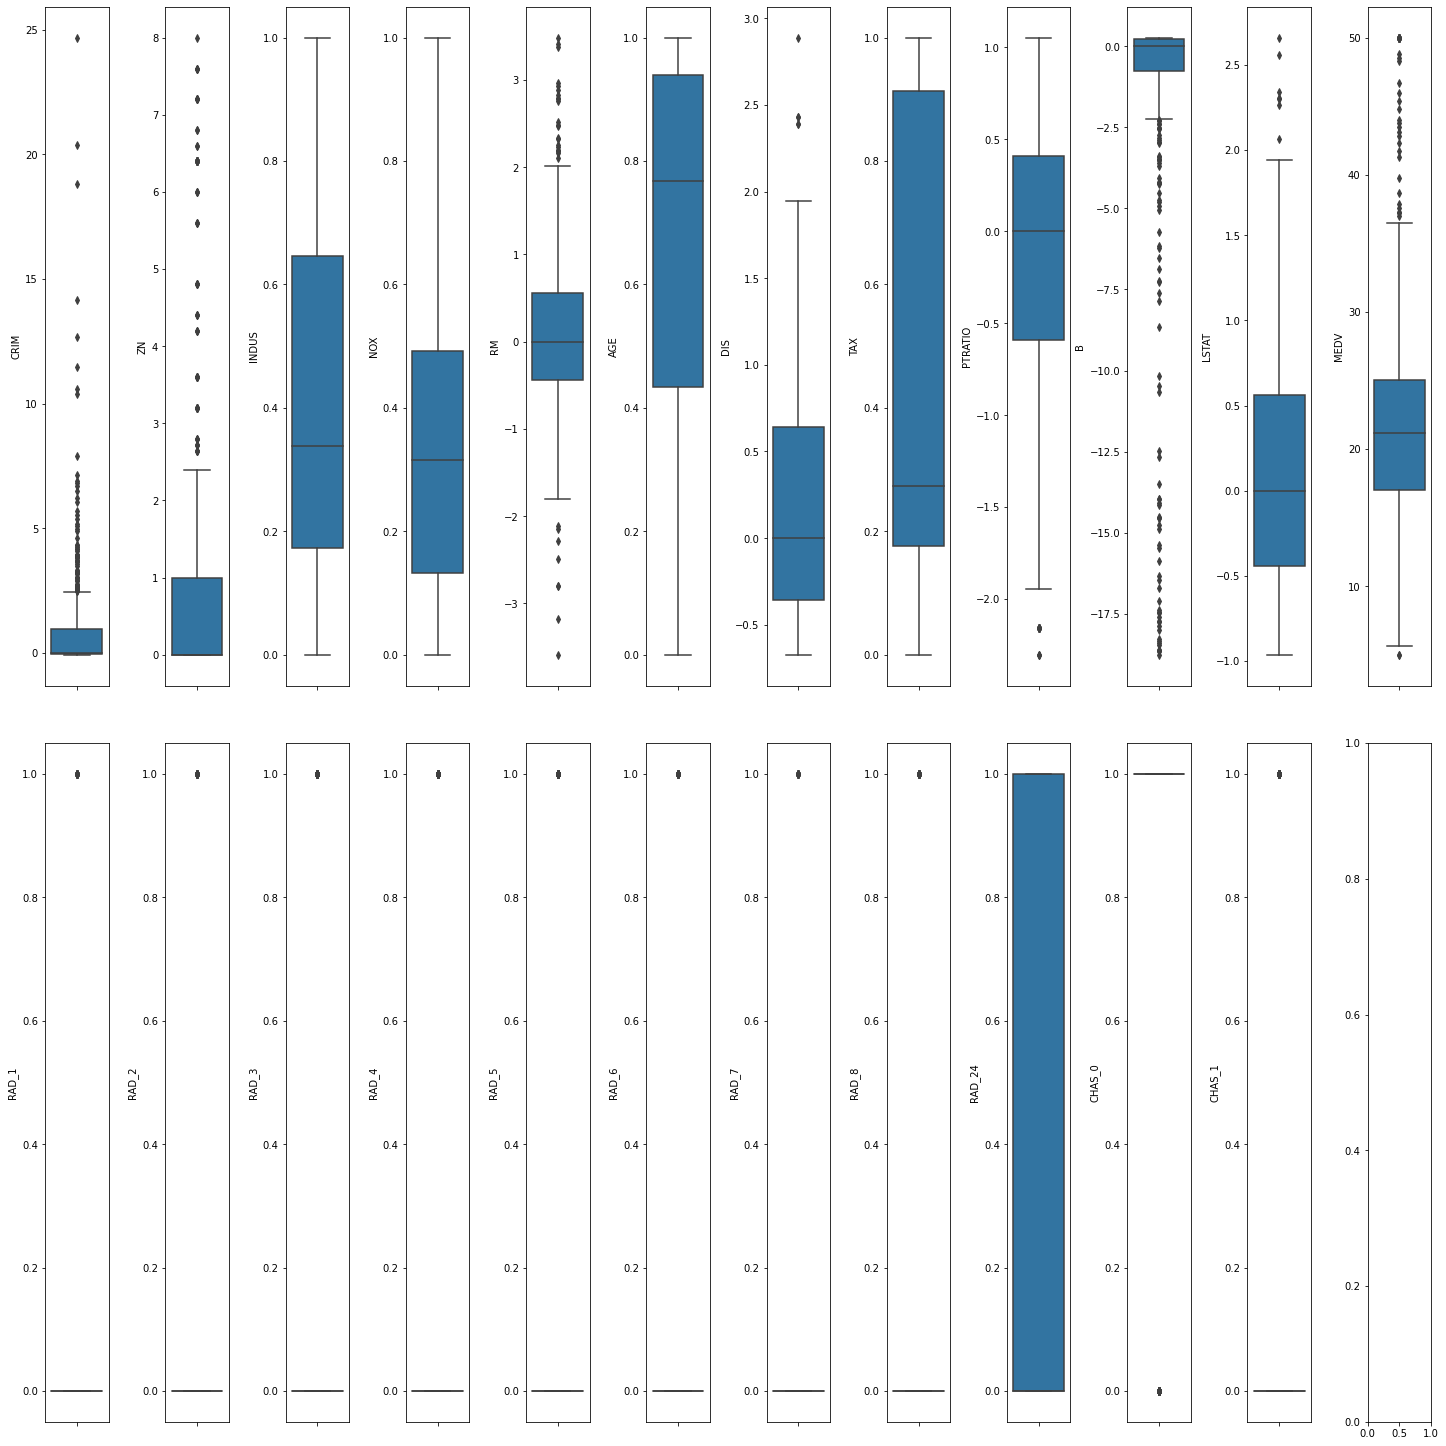

In [12]:
fig, axs = plt.subplots(ncols=12, nrows=2, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### 2. Test/Train

Procedemos con la división del conjunto de la siguiente manera: 70% Train y 30% Test.

In [13]:
# split into inputs and outputs
X = df.drop(['MEDV'], axis=1) #features
y = df['MEDV'] #target

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 22) (152, 22) (354,) (152,)


### 3. Modelo

#### 3.1. Modelo de regresión: Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred_lr = lr.predict(X_test)
y_pred_lr[0:5]

array([28.7076458 , 35.88434003, 16.72701609, 24.96758958, 18.78548806])

#### 3.2. Modelo de regresión: Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

In [18]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_pred_rf = rf.predict(X_test)
y_pred_rf[0:5]

array([22.853, 31.237, 16.036, 24.087, 16.955])

#### 3.3. Modelo de regresión: SVR

In [20]:
from sklearn.svm import SVR
svr = SVR()

In [21]:
svr.fit(X_train, y_train)

SVR()

In [22]:
y_pred_svr = svr.predict(X_test)
y_pred_svr[0:5]

array([25.20059401, 28.38395745, 18.16476781, 22.39213437, 18.76370854])

### 4. Análisis comparativo de resultados

In [23]:
data1 = {'test': y_test, 
         'lr': y_pred_lr,
         'rf': y_pred_rf,
         'svr': y_pred_svr,
        }

plotdata = pd.DataFrame(data1)
plotdata.describe().round(1)

,test,lr,rf,svr
count,152.0,152.0,152.0,152.0
mean,21.4,21.3,21.3,20.6
std,8.7,8.2,7.8,4.9
min,5.0,-6.8,6.7,10.8
25%,16.3,16.6,16.0,16.7
50%,20.0,21.0,20.3,20.5
75%,24.1,25.6,24.0,24.1
max,50.0,42.2,46.2,34.1


<AxesSubplot:title={'center':'Proceso evalución de resultados de los modelos\n'}>

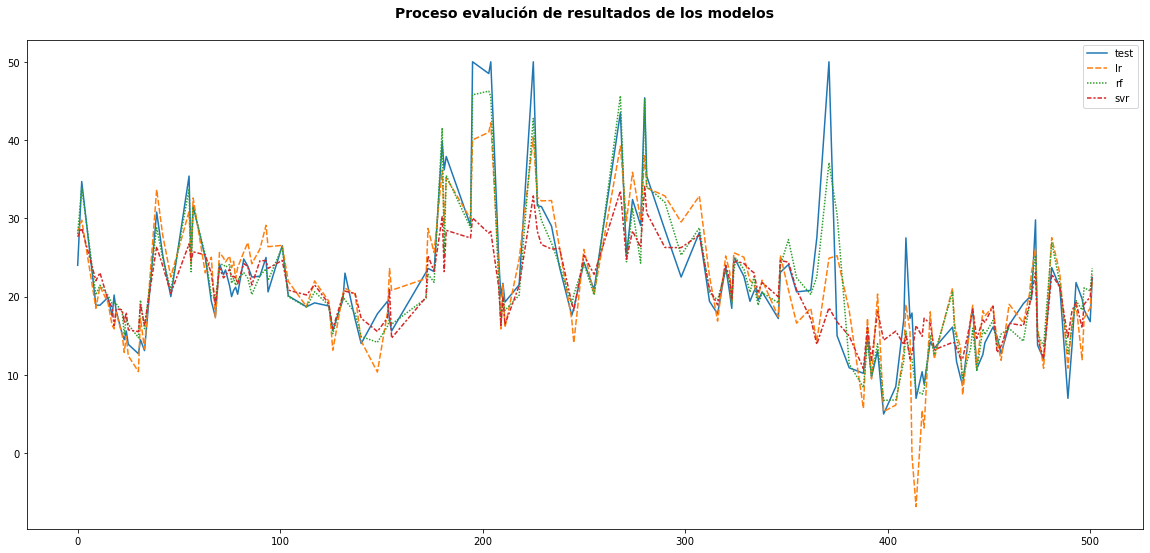

In [24]:
fig, axes = plt.subplots(figsize=(20, 9))
axes.set_title("Proceso evalución de resultados de los modelos\n", fontsize = 14, fontweight = "bold")
sns.lineplot(data=plotdata)

Analizados y comparados los datos obtenidos, a simple vista, el modelo Random Forest (RF) parece ajustarse mejor.

## Exercici 2

*Compara’ls en base al MSE i al R2.*

### 1. R2

In [25]:
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_svr = r2_score(y_test, y_pred_svr)

### 2. Error cuadrático medio (MSE)

In [26]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_svr = mean_squared_error(y_test, y_pred_svr)

### 3. Tabla comparativa

In [27]:
metrics = pd.DataFrame( data = [['Linear Regression', r2_lr, mse_lr],
                                  ['Random Forest', r2_rf, mse_rf],
                                  ['SVR', r2_svr, mse_svr]],
                                  columns = ['Model', 'R2', 'MSE'])

In [28]:
metrics.head().round(2)

,Model,R2,MSE
0,Linear Regression,0.71,21.26
1,Random Forest,0.87,9.42
2,SVR,0.58,31.54


En esta primera prueba el método de Randon Forest se muestra como el más eficiente, con un R2 del 87% y un error cuadrático medio (MSE) de 9.

## Exercici 3

*Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.*

### 1. Mejora parámetros en los modelos

#### 1.1.1. Mejora parámetros en modelos: Linear Regression

In [29]:
lr_bp = LinearRegression(fit_intercept= True).fit(X_train, y_train)
y_pred_lr_bp = lr_bp.predict(X_test)

r2_lr2 = r2_score(y_test, y_pred_lr_bp)
mse_lr2 = mean_squared_error(y_test, y_pred_lr_bp)

#### 1.1.2. Tabla comparativa

In [30]:
metrics_lr = pd.DataFrame( data = [('Linear Regression', r2_lr, mse_lr), 
                                  ('Linear Regression best params', r2_lr2, mse_lr2),],
                         columns = ['Model', 'R2', 'MSE'])

In [31]:
metrics_lr

,Model,R2,MSE
0,Linear Regression,0.714683,21.259848
1,Linear Regression best params,0.714683,21.259848


El modelo Linearregression no tiene muchos parametros que se puedan ajustar. Entonces, conservaremos las preferencias iniciales.

#### 1.2.1. Mejora parámetros en modelos: Random Forest

In [32]:
rf = RandomForestRegressor(random_state=42)

param = {'criterion':('squared_error', 'absolute_error', 'poisson'),'max_depth': [0.1,2,100]},
rsearch = RandomizedSearchCV(estimator=rf,
                             param_distributions=param, cv=5,
                             n_iter=9, random_state=42, scoring='r2')
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_params_)

0.8123130424296198
{'max_depth': 100, 'criterion': 'absolute_error'}


In [33]:
rf_bp = RandomForestRegressor(criterion='absolute_error', max_depth=100, random_state=42).fit(X_train, y_train)
y_pred_rf_bp = rf_bp.predict(X_test)

r2_rf2 = r2_score(y_test, y_pred_rf_bp)
mse_rf2 = mean_squared_error(y_test, y_pred_rf_bp)

#### 1.2.2. Tabla comparativa

In [34]:
metrics_rf = pd.DataFrame( data = [('Random Forest', r2_rf, mse_rf), 
                                  ('Random Forest best params', r2_rf2, mse_rf2)],
                         columns = ['Model', 'R2', 'MSE'])

In [35]:
metrics_rf

,Model,R2,MSE
0,Random Forest,0.873623,9.416743
1,Random Forest best params,0.880706,8.888947


#### 1.3.1. Mejora parámetros en modelos: Suppor Vector Regression

In [36]:
svr = SVR()

param = {'kernel' : ('linear', 'poly', 'rbf'),'C' : [0.1, 10, 30],'degree' : [3,8], 'epsilon' : [0.1,5],
         'coef0' : [0.00,0.5],'gamma' : ('auto','scale')},
rsearch = RandomizedSearchCV(estimator=svr,
                             param_distributions=param,cv=5,
                             n_iter=10,random_state=42,scoring='r2')
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_params_)

0.7432043588527346
{'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'degree': 8, 'coef0': 0.0, 'C': 10}


In [37]:
svr_bp = SVR(kernel='rbf', gamma='scale', degree=8, coef0= 0.0, C= 10, epsilon=0.1).fit(X_train, y_train)
y_pred_svr_bp = svr_bp.predict(X_test)

In [38]:
r2_svr2 = r2_score(y_test, y_pred_svr_bp)
mse_svr2 = mean_squared_error(y_test, y_pred_svr_bp)

#### 1.3.2. Tabla comparativa

In [39]:
metrics_svr = pd.DataFrame( data = [('SVR', r2_svr, mse_svr), 
                                  ('SVR best params', r2_svr2, mse_svr2)],
                         columns = ['Model', 'R2', 'MSE'])

In [40]:
metrics_svr

,Model,R2,MSE
0,SVR,0.576654,31.544817
1,SVR best params,0.763094,17.652625


### 2. Evaluación resultados de los modelos mejorados

In [41]:
metrics_bp = pd.DataFrame(data = [('Linear Regression', r2_lr, mse_lr)], 
                             columns = ['Model', 'R2', 'MSE'])

metrics_bp = pd.concat([metrics_bp, metrics_rf, metrics_svr])

In [42]:
metrics_bp.head()

,Model,R2,MSE
0,Linear Regression,0.714683,21.259848
0,Random Forest,0.873623,9.416743
1,Random Forest best params,0.880706,8.888947
0,SVR,0.576654,31.544817
1,SVR best params,0.763094,17.652625


Basado tanto en R2 como en MSE, el mejor modelo es el nuevo modelo entrenado de Random Forest.

## Exercici 4

*Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).*

In [43]:
cv_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
cv_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
cv_svr = cross_val_score(svr, X_train, y_train, cv=5, scoring='r2')
cv_rf_bp = cross_val_score(rf_bp, X_train, y_train, cv=5, scoring='r2')
cv_svr_bp = cross_val_score(svr_bp, X_train, y_train, cv=5, scoring='r2')

In [44]:
cv_lr_mean = [cv_lr.mean(), cv_rf.mean(), cv_rf_bp.mean(), cv_svr.mean(), cv_svr_bp.mean()]
metrics_bp['R2 with CV'] = cv_lr_mean

In [45]:
metrics_bp.head()

,Model,R2,MSE,R2 with CV
0,Linear Regression,0.714683,21.259848,0.695076
0,Random Forest,0.873623,9.416743,0.810827
1,Random Forest best params,0.880706,8.888947,0.812313
0,SVR,0.576654,31.544817,0.548791
1,SVR best params,0.763094,17.652625,0.743204


## Exercici 5

*No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.*

### 1. Train/Test

In [46]:
X_RM = X.drop(['RM'], axis=1)
X_RM.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6', 'RAD_7',
       'RAD_8', 'RAD_24', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [47]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X_RM, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 21) (152, 21) (354,) (152,)


### 2. Modelo

#### 2.1. Linear Regression

In [48]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_lr[0:5]

array([29.92012887, 36.64201222, 15.00132185, 25.29215758, 17.80485813])

#### 2.2. SVR

In [49]:
svr = SVR()

svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)
y_pred_svr[0:5]

array([24.02731489, 26.81525944, 18.32237138, 22.88089501, 18.40257845])

#### 2.3. Random Forest

In [50]:
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf[0:5]

array([23.269, 36.348, 15.486, 24.697, 17.231])

### 3. Evaluación

In [51]:
r2_lr_RM = r2_score(y_test, y_pred_lr)
mse_lr_RM = mean_squared_error(y_test, y_pred_lr)

r2_lr_RM, mse_lr_RM

(0.6926032586748163, 22.90508276361431)

In [52]:
r2_svr_RM = r2_score(y_test, y_pred_svr)
mse_svr_RM = mean_squared_error(y_test, y_pred_svr)

r2_svr_RM, mse_svr_RM

(0.44317651879420294, 41.49064126951996)

In [53]:
r2_rf_RM = r2_score(y_test, y_pred_rf)
mse_rf_RM = mean_squared_error(y_test, y_pred_rf)

r2_rf_RM, mse_rf_RM

(0.7721859573337191, 16.975129532894726)

In [54]:
metrics_RM = pd.DataFrame( data = [('Linear Regression', r2_lr_RM, mse_lr_RM),
                                ('Random Forest', r2_rf_RM, mse_rf_RM),
                                ('SVR', r2_svr_RM, mse_svr_RM)],
                         columns = ['Model', 'R2','MSE'])

In [55]:
metrics_RM

,Model,R2,MSE
0,Linear Regression,0.692603,22.905083
1,Random Forest,0.772186,16.975130
2,SVR,0.443177,41.490641


### 4. Cross validation

In [56]:
cv_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 5)
cv_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 5)
cv_svr = cross_val_score(estimator = svr, X = X_train, y = y_train, cv = 5)

In [57]:
cv_rf_mean = [cv_lr.mean(), cv_rf.mean(), cv_svr.mean()]

metrics_RM['R2 with CV'] = cv_rf_mean

In [58]:
metrics_RM

,Model,R2,MSE,R2 with CV
0,Linear Regression,0.692603,22.905083,0.658251
1,Random Forest,0.772186,16.975130,0.778674
2,SVR,0.443177,41.490641,0.392648


### 5. Mejora de parámetros

#### 5.1. Random Forest

In [59]:
rf = RandomForestRegressor(random_state=42)

param = {'criterion':('squared_error', 'absolute_error', 'poisson'),'max_depth': [0.1,2,100]},
rsearch = RandomizedSearchCV(estimator=rf,
                             param_distributions=param, cv=5,
                             n_iter=9, random_state=42, scoring='r2')
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_params_)

0.7786744435875401
{'max_depth': 100, 'criterion': 'squared_error'}


In [60]:
rf_bp = RandomForestRegressor(criterion='absolute_error', max_depth=100, random_state=42).fit(X_train, y_train)
y_pred_rf_bp = rf_bp.predict(X_test)

In [61]:
r2_rf2_RM = r2_score(y_test, y_pred_rf_bp)
mse_rf2_RM = mean_squared_error(y_test, y_pred_rf_bp)
cv_rf2 = cross_val_score(estimator = rf_bp, X = X_train, y = y_train, cv = 5)

#### 5.2. SVR

In [62]:
svr = SVR()

param = {'kernel' : ('linear', 'poly', 'rbf'),'C' : [0.1, 10, 30],'degree' : [3,8], 'epsilon' : [0.1,5],
         'coef0' : [0.00,0.5],'gamma' : ('auto','scale')},
rsearch = RandomizedSearchCV(estimator=svr,
                             param_distributions=param,cv=5,
                             n_iter=10,random_state=42,scoring='r2')
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_params_)

0.6509421801253371
{'kernel': 'linear', 'gamma': 'auto', 'epsilon': 0.1, 'degree': 8, 'coef0': 0.5, 'C': 30}


In [63]:
svr_bp = SVR(kernel='linear', gamma='auto', degree=8, coef0= 0.5, C= 30, epsilon=0.1).fit(X_train, y_train)
y_pred_svr_bp = svr_bp.predict(X_test)

In [64]:
r2_svr2_RM = r2_score(y_test, y_pred_svr_bp)
mse_svr2_RM = mean_squared_error(y_test, y_pred_svr_bp)
cv_svr2 = cross_val_score(estimator = svr_bp, X = X_train, y = y_train, cv = 5)

#### 5.3. Resultados

In [65]:
metrics_RM_bp = pd.DataFrame( data = [('Random Forest best params', r2_rf2_RM, mse_rf2_RM, cv_rf2.mean()),
                             ('SVR best params', r2_svr2_RM, mse_svr2_RM, cv_svr2.mean())],
                             columns = ['Model', 'R2', 'MSE','R2 with CV'])

metrics_RM = pd.concat([metrics_RM, metrics_RM_bp], ignore_index=True)

In [66]:
metrics_RM.sort_values("Model")

,Model,R2,MSE,R2 with CV
0,Linear Regression,0.692603,22.905083,0.658251
1,Random Forest,0.772186,16.975130,0.778674
3,Random Forest best params,0.785018,16.018985,0.775993
2,SVR,0.443177,41.490641,0.392648
4,SVR best params,0.690725,23.045069,0.650942


### 6. Conclusiones

A continuación, a modo de validación interna, compararemos el rendimento con los diferentes resultados obtenidos de los dos datasets.

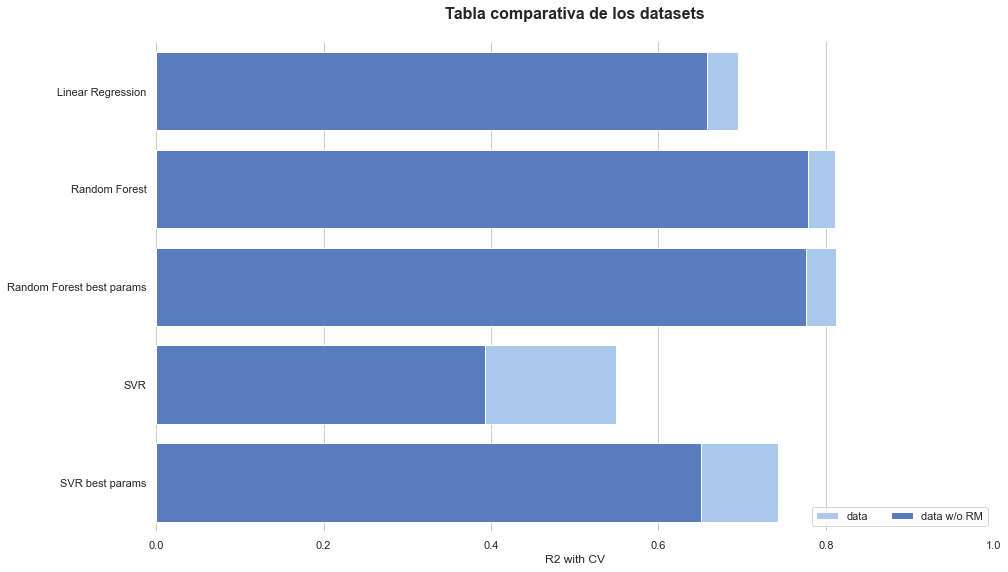

In [67]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))
ax.set_title("Tabla comparativa de los datasets\n", fontsize = 16, fontweight = "bold")

# Plot the models with original data
sns.set_color_codes("pastel")
sns.barplot(x="R2 with CV", y="Model", data=metrics_bp.sort_values('Model'),
            label="data", color="b")

# Plot the models where average number of rooms per dwelling (RM) is not included
sns.set_color_codes("muted")
sns.barplot(x="R2 with CV", y="Model", data=metrics_RM.sort_values('Model'),
            label="data w/o RM", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="R2 with CV")
sns.despine(left=True, bottom=True)

Comparados los datos, los resultados bajan sustancialmente al eliminar la feature (data w/o RM)

Por lo tanto, podemos concluir que la variable *RM (número de habitaciones)* es muy relevante a la hora de valorar y predecir los precios de la vivienda, tal y como vimos en la matriz de correlación del principio. El target (MEDV) se relaciona directamente con la variable que acabamos de analizar.
